<a href="https://colab.research.google.com/github/Jacquesjh/Fashion-MNIST/blob/main/Fashion_Mnist_Pre_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Começamos verificando nosso destino de trabalho

In [1]:
%cd /content/drive/MyDrive/Machine Learning/DeepLearning.AI-Course/TensorFlow for AI, ML and DL/Fashion MNIST

/content/drive/MyDrive/Machine Learning/DeepLearning.AI-Course/TensorFlow for AI, ML and DL/Fashion MNIST


#Podemos importar as bibliotecas que iremos utilizar

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

#Agora iremos carregar os dados do dataset

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist

##O dataset consiste de 70,000 (60,000 para treino e 10,000 para teste) imagens com resolução 28x28 em escala de cinzas (0, 255), categorizadas em 10 diferentes classes de vestimentas

In [11]:
##O método load_data retorna os dados já divididos entre treino e teste, num formato ndarray
(train_inputs, train_targets), (test_inputs, test_targets) = fashion_mnist.load_data()

###Podemos verificar a estrutura dos itens

In [33]:
##O formato de inputs são iguais aos targets
print(train_inputs.shape)
print(test_inputs.shape)

print('Ou seja, temos {0:} imagens, cada uma com {1:} por {2:} pixeis.'.format(train_inputs.shape[0] + test_inputs.shape[0], train_inputs.shape[1], train_inputs.shape[2]))

(60000, 28, 28)
(10000, 28, 28)
Ou seja, temos 70000 imagens, cada uma com 28 por 28 pixeis.


In [15]:
##Podemos verificar a estrutura de cada item também
train_inputs[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

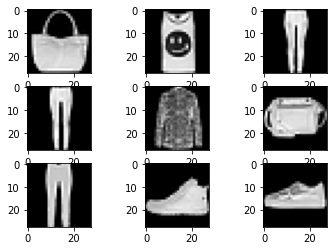

In [35]:
##Também, podemos verificar as imagens propriamente ditas
for i in range(9):  
  plt.subplot(330 + 1 + i)
  plt.imshow(train_inputs[i+100], cmap=plt.get_cmap('gray'))

plt.show()

##Podemos normalizar os valores de nossos dados. Como o domínio dos dados estão entre 0 e 255, podemos normalizá-los para um intervalo de [0, 1]

###Mas antes, iremos fazer um checkpoint dos nossos dados

In [36]:
norm_train_inputs, norm_train_targets = train_inputs, train_targets
norm_test_inputs, norm_test_targets = test_inputs, test_targets

###Como nossos dados são do tipo ndarray, podemos fazer issod e uma forma bem direta

In [37]:
##Precisamos normalizar apenas os inputs, uma vez que o targets são as classificações entre 0 e 9
norm_train_inputs = norm_train_inputs/255.0
norm_test_inputs = norm_test_inputs/255.0


In [38]:
##Podemos observar esta mudança
norm_train_inputs[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#Estes são os únicos passos de pré processamento que iremos fazer, uma vez que estes dados já estao bem ordenados e comportados

#Podemos agora criar um dataset de validação, do dataset de treino, pois é o maior

##Iremos criar um dataset com 10,000 imagens, para nos dar uma boa proporção de treino, validação e teste.

In [41]:
num_val_samples = 10000

In [42]:
val_inputs = norm_train_inputs[: num_val_samples]
val_targets = train_targets[: num_val_samples]

new_train_inputs = norm_train_inputs[num_val_samples: ]
new_train_targets = train_targets[num_val_samples: ]

In [45]:
print(val_inputs.shape)
print(new_train_inputs.shape)

(10000, 28, 28)
(50000, 28, 28)


#Agora que criamos com sucesso nossos sets de treino, validação e teste, podemos salvar nossos dados para posteriormente criarmos nosso modelo de rede neural

In [46]:
np.savez('Fashion_Mnist_train_data', inputs = new_train_inputs, targets = new_train_targets)
np.savez('Fashion_Mnist_validation_data_', inputs = val_inputs, targets = val_targets)
np.savez('Fashion_Mnist_test_data', inputs = norm_test_inputs, targets = test_targets)